<a href="https://colab.research.google.com/github/hoangnuthuphuong/MACHINE-LEARNING-TEST/blob/main/final_test1/Th%E1%BB%AD_nghi%E1%BB%87m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


cannot identify image file '/content/drive/MyDrive/PetImages/Cat/666.jpg'
cannot identify image file '/content/drive/MyDrive/PetImages/Cat/Thumbs.db'
cannot identify image file '/content/drive/MyDrive/PetImages/Dog/11702.jpg'
cannot identify image file '/content/drive/MyDrive/PetImages/Dog/Thumbs.db'
{0: 48, 1: 48}
Kết quả dự đoán của mô hình kNN:
 [0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0]
Kết quả dự đoán của mô hình logregession:
 [1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0]

Confusion matrix, without normalization
[[7 8]
 [5 9]]


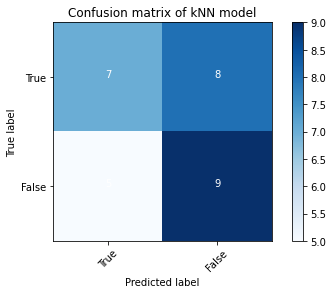


Confusion matrix, without normalization
[[ 5 10]
 [ 7  7]]


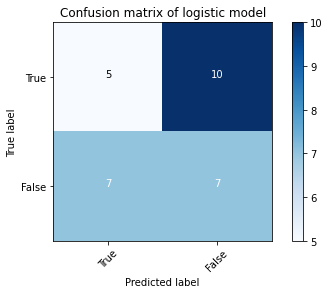


ĐÁNH GIÁ MÔ HÌNH K-NN
accuracy score:  0.5517241379310345
Balandced accuracy score:  0.5547619047619048
Haming loss:  0.4482758620689655

ĐÁNH GIÁ MÔ HÌNH LOGISTIC RREGRESSION
accuracy score:  0.41379310344827586
Balandced accuracy score:  0.41666666666666663
Haming loss:  0.5862068965517241
Classification report:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        15
           1       0.53      0.64      0.58        14

    accuracy                           0.55        29
   macro avg       0.56      0.55      0.55        29
weighted avg       0.56      0.55      0.55        29

Classification report:
              precision    recall  f1-score   support

           0       0.42      0.33      0.37        15
           1       0.41      0.50      0.45        14

    accuracy                           0.41        29
   macro avg       0.41      0.42      0.41        29
weighted avg       0.41      0.41      0.41        29


	Bảng

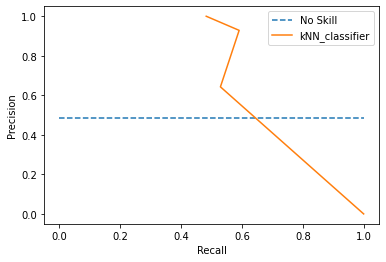


	precision_recall_curve mô hình logistic


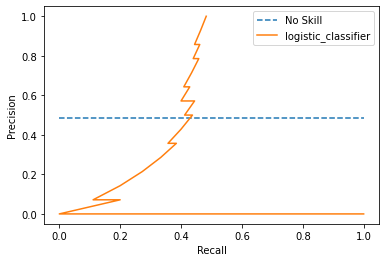


	ROC mô hình kNN


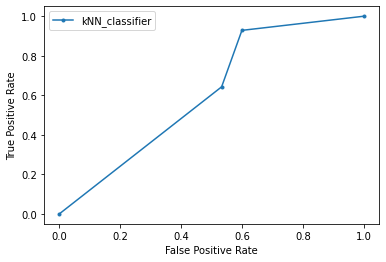


	ROC mô hình logistic_classifier


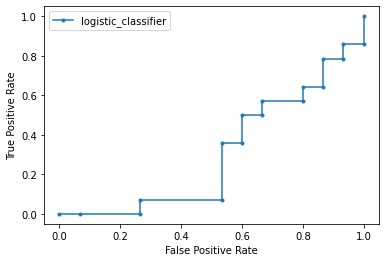

Cat:  [0 1]
Dog:  [48 48]
{0: 48, 1: 48}
None


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


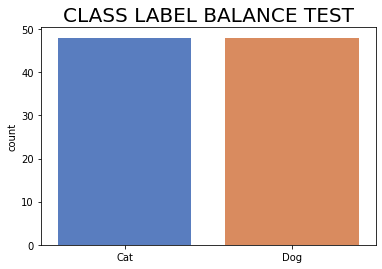

In [20]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from skimage import io
from skimage.transform import resize
import os
# Tiền xử lý dữ liệu
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
# Huấn luyện mô hình
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
# Đánh giá mô hình
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

PATH = "/content/drive/MyDrive/PetImages"

#HÀM KIỂM TRA ẢNH CÓ LỖI HAY KHÔNG
def check_corrupted_image(file):
    try:
        with Image.open(file) as img:
            img.verify()
            img_new = io.imread(os.path.join(file))
        return False
    except Exception as e:
        print(e)
        return True

def read_img_data(path, size):
    X = []
    y = []
    label = path.split ("\\")[-1]
    files = os.listdir(path)
    for img_file in files:
        if not check_corrupted_image(os.path.join(path,img_file)):
            img = io.imread(os.path.join(path, img_file), as_gray=True)
            img = resize(img, size)
            img_flatten = list(img.flatten())
            X.append(img_flatten)
            y.append(label)
    return X,y

def build_imd_data(folder_path, size):
    X = []
    y = []
    for img_folder in os.listdir(folder_path):
        X_temp, y_temp = read_img_data(os.path.join(folder_path, img_folder), size)
        X.extend(X_temp)
        y.extend(y_temp)
    return np.array(X), np.array(y)

# mã hóa nhãn lớp
def encode_label(y):
    lb = LabelBinarizer()
    return lb.fit_transform(y).reshape(y.shape[0], )

def count_unique_labels1(y):
    plt.title("CLASS LABEL BALANCE TEST", size=20, color="black")
    count_label = sns.countplot(y, label="Count", palette="muted", x="diagnosis")
    unique, counts = np.unique(y, return_counts = True)
    print('Cat: ', unique)
    print('Dog: ', counts)
    result = dict(zip(unique, counts))
    count_label.set_xticklabels(["Cat", "Dog",])
    print(result)

def count_unique_labels(y):
    unique, counts = np.unique(y, return_counts = True)
    result = dict(zip(unique, counts))
    return result




#Hàm huấn luyện mô hình
def kNN_grid_search_cv(X_train, y_train):
    from math import sqrt
    m = y_train.shape[0]
    k_max = int(sqrt(m)/2)
    k_values = np.arange(start = 1, stop = k_max + 1, dtype = int)
    params = { 'n_neighbors': k_values}
    kNN = KNeighborsClassifier()
    kNN_grid = GridSearchCV(kNN, params, cv=3)
    kNN_grid.fit(X_train, y_train)
    return kNN_grid

def logistic_regression_cv(X_train, y_train):
    logistic_classifier = LogisticRegressionCV(cv=5, solver="sag", max_iter=2000)
    logistic_classifier.fit(X_train, y_train)
    return logistic_classifier


#Hàm đánh giá mô hình
def evaluate_model(y_test, y_pred):
    print("accuracy score: ", accuracy_score(y_test, y_pred))
    print("Balandced accuracy score: ", balanced_accuracy_score(y_test, y_pred))
    print("Haming loss: ", hamming_loss(y_test, y_pred))

def evaluate_report(y_test, y_pred):
    print("Classification report:")
    print(classification_report(y_test, y_pred))



import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
     


# vì ta đã xác định được từ đầu là bài toán phân lớp nhị phân nên ta dùng thang đo "binary"
def test_score(y_test, y_pred, class_type = "binary"):
    if class_type == "binary":
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        result = [accuracy, precision, recall, f1]
    return result

def test_table(knn_score, lg_score):
    result = {"Scores": ["accuracy", "precision", "recall", "f1"],
              "kNN": knn_score,"Logistic regression":lg_score}
    return pd.DataFrame(result)


def draw_precision_recall_curve(X_test, y_test, modal, name):
    no_modal = len(y_test [y_test == 1])/len(y_test)
    plt.plot([0,1], [no_modal, no_modal], linestyle = '--', label = 'No Skill')
    probs = modal.predict_proba(X_test) [:, 1]
    pre, rec, _ = precision_recall_curve(y_test, probs)
    plt.plot(pre, rec, label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

def draw_ROC(X_test, y_test, modal, name):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    probs = modal.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    fpr, tpr, _ = roc_curve(y_test, probs)
    # plt.plot(ns_probs, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label=name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

def save_data(name,data):
    pickle_out = open(f"{name}.pickle", "wb")
    pickle.dump(data, pickle_out)
    pickle_out.close()
def import_data(name):
    pickle_in = open(f"{name}.pickle", "rb")
    X = pickle.load(pickle_in)


def main():
    # Đọc và xây dựng cơ sở dữ liệu
    X, y = build_imd_data(PATH, size = (32,32))  
    save_data("X",X)
    save_data("y",y)

    # mã hoá nhãn lớp
    y = encode_label(y)    
    print(count_unique_labels(y))

    # phân chia tập train và test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 15)

    # Huấn luyện mô hình
    kNN_classifier = kNN_grid_search_cv(X_train, y_train)
    logistic_classifier = logistic_regression_cv(X_train, y_train)
    # Lưu kết quả huấn luyện vào pickle
    save_data("kNN_classifier",kNN_classifier)
    save_data("logistic_classifier",logistic_classifier)

    # kết quả dự đoán của từng mô hình
    y_pred_kNN = kNN_classifier.predict(X_test)
    print("Kết quả dự đoán của mô hình kNN:\n",y_pred_kNN)
    y_pred_logistic = logistic_classifier.predict(X_test)
    print("Kết quả dự đoán của mô hình logregession:\n",y_pred_logistic)

    # Ma trận hỗn hợp
    confusion = confusion_matrix(y_test, y_pred_kNN)
    plot_confusion_matrix(confusion, classes=['True', 'False'],
                          title='Confusion matrix of kNN model')
    confusion = confusion_matrix(y_test, y_pred_logistic)
    plot_confusion_matrix(confusion, classes=['True', 'False'],
                          title='Confusion matrix of logistic model')

    # đánh giá mô hình
    print("\nĐÁNH GIÁ MÔ HÌNH K-NN")
    evaluate_model(y_test, y_pred_kNN)
    print("\nĐÁNH GIÁ MÔ HÌNH LOGISTIC RREGRESSION")
    evaluate_model(y_test, y_pred_logistic)

    # report
    evaluate_report(y_test, y_pred_kNN)
    evaluate_report(y_test, y_pred_logistic)

    # Kết quả các độ đo của từng mô hình
    knn_score = test_score(y_test, y_pred_kNN)
    lg_score = test_score(y_test, y_pred_logistic)

    print("\n\tBảng so sánh")
    print(test_table(knn_score,lg_score))


    print("\n\tprecision_recall_curve mô hình kNN")
    draw_precision_recall_curve(X_test, y_test,kNN_classifier, "kNN_classifier")
    print("\n\tprecision_recall_curve mô hình logistic")
    draw_precision_recall_curve(X_test, y_test,logistic_classifier, "logistic_classifier")

    print("\n\tROC mô hình kNN")
    draw_ROC(X_test, y_test,kNN_classifier, "kNN_classifier")
    print("\n\tROC mô hình logistic_classifier")
    draw_ROC(X_test, y_test, logistic_classifier, "logistic_classifier")

    print(count_unique_labels1(y))

if __name__ == '__main__':
    main()